## I.   Error control coding

### What is error control coding?

![Communication system](img/CommBlockDiagram.png)

* The second main task of coding: **error control **
* Protect information against channel errors

### Mutual information and error control

* Mutual information $I(X,Y)$ = the information transmitted on the channel

* Even though there is information transmitted on the channel, when the channel is noisy the information is **not enough** 

Example: consider the following BSC channel (p = 0.01, $p(x_1) = 0.5$, $p(x_2)=0.5$):

![Binary symmetric channel (BSC) ](img/BSC.png)

* The receiver would like to know the source messages 
    * In absence of communication, the uncertainty is $H(X) = 1$ bit/msg
    * With communication, the uncertainty is $H(X|Y) \approx 0.081$ bit/msg
    * $I(X,Y) = H(X) - H(X|Y) = \approx 0.919$ bit/msg
* Even though we have large I(X,Y), about $1\%$ of all bits are erroneuos
    * Imagine downloading a file, but having $1\%$ wrong bits    

###  Why is error control needed?

* In most communications it is required that *all* bits are received correctly
    * Not $1\%$ errors, not $0.1\%$, not $0.0001\%$. **None!**

* But that is not possible unless the channel is ideal.

* So what do to? **Error control coding**

### Modelling the errors on the channel
* We consider only binary channels (symbols = $\left\lbrace 0,1 \right\rbrace$)
* An error = a bit is changed from 0 to 1 or viceversa
* Changing the value of a bit = modulo-2 sum with 1
* Value of a bit remains the same = modulo-2 sum with 0
    
![Channel error model](img/ChannelErrorModel.png)

* Channel model we use (simple):
    * The transmitted sequence is summed modulo-2 with an **error sequence**
    * Where the error sequence is 1, there is a bit error
    * Where the error sequence is 0, there is no error
$$\mathbf{r} = \mathbf{c} \oplus \mathbf{e}$$

### Error detection and error correction

Binary error correction:

* For binary channels, know the location of error => fix error by inverting bit
* Locating error = correcting error

Two possibilities in practice:

* **Error detection**: find out if there is any error in the received sequence
    * don't know exactly where, so cannot correct the bits, but can discard whole sequence
    * perhaps ask the sender to retransmit (examples: TCP/IP, internet communication etc)
    * easier to do
* **Error correction**: find out exactly which bits have errors, if any
    * can correct all errored bits by inverting them
    * useful when can't retransmit (data is stored: on HDD, AudioCD etc.)
    * harder to do than mere detection

### What is error control coding?

The process of error control:

1. Want to send a sequence of $k$ bits = **information word**
$$\mathbf{i} = i_1i_2...i_k$$

2. For each possible information word, the coder assigns a **codeword** of length $n > k$:
$$\mathbf{c} = c_1c_2...c_n$$

3. The codeword is sent on the channel instead of the original information word

4. The receiver receives a sequence $\mathbf{r} = \mathbf{c} + \mathbf{e}$, with possible errors:
$$\mathbf{r} = r_1 r_2 ... r_n$$

5. The decoding algorithm detects/corrects the errors in $\mathbf{r}$

### Definitions

* An **error correcting code** is an association between the set of all possible information words to a set of codewords
    * Each possible information word $\mathbf{i}$ has a certain codeword $\mathbf{c}$
* The association can be done:
    * randomly: codewords are selected and associated randomly to the information words
    * based on a certain rule: the codeword is computed with some algorithm from the information word

* A code is a **block code** if it operates with words of *fixed size*
    * Size of information word $\mathbf{i} = k$, size of codeword $\mathbf{c} = n$, $n > k$
    * Otherwise it is a *non-block code*
    
* A code is **linear** if any linear combination of codewords is also a codeword

* The **coding rate** of a code is:
$$R = \frac{k}{n}$$

### Definitions

* A code $C$ is an **$t$-error-detecting** code if it is able to *detect* $t$ errors

* A code $C$ is an **$t$-error-correcting** code if it is able to *correct* $t$ errors


### Hamming distance

* The **Hamming distance** of two binary sequences $a$, $b$ of length $n$ = the total number
of bit differences between them
$$d_H(a, b) = \sum_{i=1}^N a_i \bigoplus b_i$$

* We need at least $d_H(a, b)$ bit changes to convert one sequence into another

* It satisfies the 3 properties of a metric function:
    1. $d(a,b) \geq 0 \forall a,b$, with $d(a,b) = 0 \Leftrightarrow a = b$
    2. $d(a,b) = d(b,a), \forall a,b$
    3. $d(a,c) \leq d(a,b) + d(b,c), \forall a,b,c$

* The **minimum Hamming distance of a code**, ${d_H}_{min}$ = the minimum Hamming distance
between any two codewords $\mathbf{c_1}$ and $\mathbf{c_2}$

* Example at blackboard


### Linear block codes

* A code is a **block code** if it operates with words of *fixed size*
    * Size of information word $\mathbf{i} = k$, size of codeword $\mathbf{c} = n$, $n > k$
    * Otherwise it is a *non-block code*
    
* A code is **linear** if any linear combination of codewords is also a codeword

* A code is called **systematic** if the codeword contains all the information bits explicitly, unaltered
    * coding merely adds supplementary bits besides the information bits
    * codeword has two parts: the information bits and the parity bits
    * example: parity bit added after the information bits
    
* Otherwise the code is called **non-systematic**
    * the information bits are not explicitly visible in the codeword

* Example: at blackboard

### Generator matrix 

* All codewords for a linear block code can be generated via a matrix multiplication:
$$\mathbf{i} \cdot [G] = \mathbf{c}$$

![Codeword construction with generator matrix](img/GeneratorMatrix.png)

* $[G]$ = **generator matrix** of size $k \times n$

* All operations are done in modulo-2 arithmetic:
    * $0 \oplus 0 = 0$, $0 \oplus 1 = 1$, $1 \oplus 0 = 1$, $1 \oplus 1 = 0$
    * multiplications as usual
    
* Row-wise interpretation:
    * $\mathbf{c}$ = a linear combination of rows in $[G]$
    * The rows of $[G]$ = a *basis* for the linear code

### Parity check matrix

* How to check if a binary word is a codeword or not
* Every $k \times n$ generator matrix $[G]$ has complementary matrix $[H]$ such that
$$0 = [H] \cdot [G]^T$$

* For every codeword $\mathbf{c}$ generated with $[G]$:
$$\boxed{ 0 = [H] \cdot \mathbf{c}^T }$$

* because:
$$\mathbf{i} \cdot [G] = \mathbf{c}$$
$$[G]^T \cdot \mathbf{i}^T = \mathbf{c}^T$$
$$[H] \cdot \mathbf{c}^T = [H] \cdot [G]^T \cdot \mathbf{i}^T = 0$$

### Parity check matrix

* $[H]$ is the **parity-check matrix**, size = $(n-k) \times n$
* $[G]$ and $[H]$ are related, one can be deduced from the other
* The resulting vector $z = [H] \cdot [c]^T$ is the **syndrome**
* All codewords generated with $[G]$ will produce $0$ when multiplied with $[H]$
* All binary sequences that are not codewords will produce $\neq 0$ when multiplied with $[H]$

* Column-wise interpretation of multiplication:

![Codeword checking with parity-check matrix](img/ParityCheckMatrix.png)

### [G] and [H] for systematic codes

* For systematic codes, [G] and [H] have special forms
* Generator matrix
    * first part = some matrix $Q$
    * second part = identity matrix
    
$$[G]_{k \times n} = [Q_{k \times (n-k)} \;\; I_{k \times k}]$$

* Parity-check matrix
    * first part = identity matrix
    * second part = same Q, transposed
    
$$[H]_{(n-k) \times n} = [I_{(n-k) \times (n-k)} \;\; Q^T_{(n-k) \times k}]$$

* Can easily compute one from the other

* Example at blackboard

### Syndrome-based error detection

Syndrome-based error *detection* for linear block codes:

1. generate codewords with generator matrix:
$$\mathbf{i} \cdot [G] = \mathbf{c}$$

2. send codeword $\mathbf{c}$ on the channel
3. random error word $\mathbf{e}$ is applied on the channel
4. receive word $\mathbf{r} = \mathbf{c} \oplus \mathbf{e}$

5. compute **syndrome** of $\mathbf{r}$:
$$\mathbf{z} = [H] \cdot \mathbf{r}^T$$

6. Decide:
    * If $\mathbf{z} = 0$ => $\mathbf{r}$ has no errors
    * If $\mathbf{z} \neq 0$ => $\mathbf{r}$ has errors

### Syndrome-based error correction

Syndrome-based error *correction* for linear block codes:

* $\mathbf{z} \neq 0$ => $\mathbf{r}$ has errors, we need to locate them

* The syndrome is the effect only of the error word:
$$\mathbf{z} = [H] \cdot \mathbf{r}^T = [H] \cdot (\mathbf{c}^T \oplus \mathbf{e}^T) = [H] \cdot \mathbf{e}^T$$

7. Create a **syndrome lookup table**:
    * for every possible error word $\mathbf{e}$, compute the syndrome $\mathbf{z} = [H] \cdot \mathbf{e}^T$
    * start with error words with 1 error (most likely), then with 2 errors (less likely), and so on

8. Locate the syndrome $\mathbf{z}$ in the table, read the corresponding error word $\mathbf{\hat{e}}$

9. Find the correct word:
    * adding the error word again will invert the errored bits back to the originals
$$\mathbf{\hat{c}} = \mathbf{r}  \oplus \mathbf{\hat{e}}$$

### Hamming codes

* Simple class of linear error-correcting codes

* Definition: a **Hamming code** is a linear block code where the columns of $[H]$
are *the binary representation of all numbers from 1 to $2^r-1$*, $\forall r \geq 2$

* Example (blackboard): (7,4) Hamming code

* Systematic: (arrange the $r$ columns with a single 1 to the left, forming identity matrix)
    
**OR, better:**
    
* Leave columns in natural order, but shuffle the order of the bits in the codeword, such that the control bits still correspond to the columns having a single 1
    * no significant difference from the usual systematic case
    * makes implementation easier
    * Example at the blackboard

### Properties of Hamming codes

* From definition of $[H]$ (systematic) it follows:
    1. Codeword has length $n = 2^r - 1$
    2. $r$ bits are parity bits
    3. $k = 2^r-r-1$ bits are information bits

* Same for non-systematic, but bits are arranged differently

* Notation: **(n,k) Hamming code**
    * n = codeword length = $2^r-1$, 
    * k = number of information bits  = $2^r - r - 1$
    * Example: (7,4) Hamming code, (15,11) Hamming code, $(127,120)$ Hamming code


### Properties of Hamming codes

* Can detect two errors
	* All columns are different => can detect 2 errors
	* Sum of two columns equal to a third => cannot correct 3

**OR**

* Can correct one error
	* All columns are different => can correct 1 error
	* Sum of two columns equal to a third => cannot correct 2
	* Non-systematic: syndrome = error position

**BUT**
* Not simultaneously!
    * same non-zero syndrome can be obtained with 1 or 2 errors, can't distinguish

### SECDED Hamming codes
 
* Add an additional parity bit to differentiate the two cases
    * = sum of all $n$ bits of the codeword

* Compute syndrome of the received word *without the additional parity bit*
	* If 1 error happened: syndrome is non-zero, parity bit does not match
	* If 2 errors happened: syndrome is non-zero, parity bit matches (the two errors cancel out)
	* If 3 errors happened: same as 1, can't differentiate

* Now can simultaneously differentiate between:
    * 1 error: perform correction
    * 2 errors: detect, but do not perform correction
    
* If correction is never attempted, can detect up to 3 errors
    * minimum Hamming distance = 4 (no proof)
    * don't know if 1 error or more, so can't try correction
    
* Known as SECDED Hamming codes
    * **S**ingle **E**rror **C**orrection - **D**ouble **E**rror **D**etection

### Decoding SECDED Hamming codes


Decoding with detection and correction

1. Compute syndrome of received word without the additional parity bit
2. If zero, no error
3. If non-zero, check parity bit:

    * If does not match => one error => perform correction
    
    * If does match => two errors => do not correct
    
Decoding with detection only

1. Compute syndrome of received word, also check additional parity bit
2. If syndrome is zero and parity bit is ok => no error
3. If syndrome non-zero or parity bit does not match => 1 or 2 or 3 errors have happened, do not correct

### Summary until now

* Systematic codes: information bits + parity bits
* Generator matrix: use to generate codeword
$$\mathbf{i} \cdot [G] = \mathbf{c}$$
* Parity-check matrix: use to check if a codeword
$$0 = [H] \cdot \mathbf{c}^T$$
* Syndrome:
$$\mathbf{z} = [H] \cdot \mathbf{r}^T$$
* Syndrome-based error detection: syndrome non-zero
* Syndrome-based error correction: lookup table
* Hamming codes: $[H]$ contains all numbers $1 ... 2^r - 1$
* SECDED Hamming codes: add an extra parity bit

### Cyclic codes

Definition: **cyclic codes** are a particular class of linear block codes
for which *every cyclic shift of a codeword is also a codeword*

* Cyclic shift: cyclic rotation of a sequence of bits (any direction)

* Are a particular class of linear block codes, so all the theory up to now still applies
    * they have a generator matrix, parity check matrix etc.
    
* But they can be implemented more efficient than general linear block codes (e.g. Hamming)

* Used **everywhere** under the common name **CRC** (**C**yclic **R**edundancy **C**heck)
    * Network communications (Ethernet), data storage in Flash memory

### Binary polynomials

* Every binary sequence corresponds to a polynomial with binary coefficients (**to check order**):
$$10010111 \rightarrow X^7 \oplus X^4 \oplus X^2 \oplus X \oplus 1$$

(From now on, by "codeword" we also mean the corresponding polynomial)

** also write in general**

* Can perform all operations with these polynomials:
    * addition, multiplication, division etc. (examples)

* There are efficient circuits for performing multiplications


### Generator polynomial

**Theorem**: 

All the codewords of a cyclic code are multiples of a certain polynomial $g(x)$,
known as **generator polynomial**. 

Properties of generator polynomial $g(x)$:

* The generator polynomial has first and last coefficient equal to 1.
* The generator polynomial is a factor of $X^n \oplus 1$
* The *degree* of $g(x)$ is $n-k$, where:
    * The codeword = polynomial of degree $n-1$ ($n$ coefficients)
    * The information polynomial = polynomial of degree $k-1$ ($k$ coefficients)
$$ (k-1) + (n-k) = n-1$$

### Finding a generator polynomial

**Theorem**: 

If $g(x)$ is a polynomial of degree $(n-k)$ and is a factor of $X^n \oplus 1$, 
then $g(x)$ generates a $(n,k)$ cyclic code

Example:

$$x^7 \oplus 1 = (1 \oplus X)(1 \oplus X + \oplus X^3)(1 \oplus X^2 \oplus X^3)$$

Each factor generates a code:

* $1 \oplus X$ generates a (7,6) cyclic code
* $1 \oplus X \oplus X^3$ generates a (7,4) cyclic code
* $1 \oplus X^2 \oplus X^3$ generates a (7,4) cyclic code

### Computing the codewords

**Non-systematic** codeword generation:

* Codeword = information polynomial * $g(x)$

$$\boxed{c(x) = i(x) \cdot g(x)}$$

**Systematic** codeword generation:

$$\boxed{c(x) = b(x) \oplus X^{n-k}i(x)}$$

where $b(x)$ is the remainder of dividing $X^{n-k} i(x)$ to $g(x)$:
$$X^{n-k} i(x) = a(x) g(x) \oplus b(x)$$

* (Proof: at blackboard)

### Proving the cyclic property

We can prove that if any cyclic shift of a codeword is also a codeword

Proof: at whiteboard

### Cyclic code encoder circuits

* Coding = based on polynomial multiplications and divisions
* Efficient circuits for multiplication / division exist

* Similar circuit exists for systematic codeword generation (draw on blackboard)

### Circuits for multiplication binary polynomials

![Circuits for polynomial multiplication](img/MultiplicationCircuits.png)

### Circuits for division binary polynomials

![Circuits for polynomial division](img/DivisionCircuits.png)

### Error detection with cyclic codes

* Like usual for linear codes: check if received word is codeword or not

* Every codeword is multiple of $g(x)$

* Check if received word is actually dividing with $g(x)$
    * Use a circuit for division of polynomials
    
* If remainder is 0 => it is a codeword, no error

* If remainder is non-0 => error detected!

* Cyclic codes have very good error detection capabilities

### Error correction capability

Theorem:

Any (n,k) cyclic codes is capable of detecting any error **burst** of length $n-k$ or less.

* A large fraction of longer bursts can also be detected (but not all)

* For non-burst errors (random): more difficult to analyze

### Error correction with cyclic codes

* Like usual for linear codes: lookup table based on remainder

* Remainder of division = the effect of the error polynomial

* Create lookup table: for every error word, compute remainder

* Search the table for the remainder of the received word => find error word

### Summary of cyclic codes

* Generated using a generator polynomial $g(x)$
* Non-systematic:
$$c(x) = i(x) \cdot g(x)$$
* Systematic:
$$c(x) = b(x) \oplus X^{n-k}i(x)$$
    *  $b(x)$ is the remainder of dividing $X^{n-k} i(x)$ to $g(x)$
* Syndrome = remainder of division $r(x)$ to $g(x)$
* Error detection: remainder (syndrome) non-zero
* Error correction: lookup table 

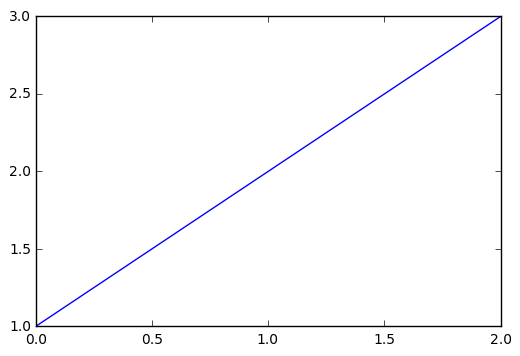

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
x = 'TEST'
plt.plot([1,2,3])